# Running Time Comparisons

## Necessary Imports, Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Vidhish17\AppData\Local\Temp\ipykernel_5204\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
programs = ['Pi Computation C++', 'Running Sum C++', 'Matrix Multiplication C++', 'Dot Product C++', 'Count Primes C++', 'Merge Sort C++']
data = {i: pd.read_excel('OpenMP_Comparisons.xlsx', sheet_name=i) for i in programs}

In [3]:
print(programs[0])
data[programs[0]]

Pi Computation C++


,Serial,Parallel (16 threads)
0,0.411210,0.057464
1,0.420943,0.060519
2,0.419706,0.067449
3,0.423570,0.055788
4,0.414644,0.079546
5,0.416654,0.061623
6,0.412854,0.062451
7,0.411772,0.062103
8,0.414169,0.052071
9,0.415654,0.063841


In [4]:
data[programs[0]].describe()

,Serial,Parallel (16 threads)
count,15.000000,15.000000
mean,0.413365,0.061568
std,0.011136,0.006600
min,0.385774,0.052071
25%,0.412313,0.057034
50%,0.415654,0.061047
75%,0.420614,0.063146
max,0.423570,0.079546


## Describe Each of The Programs

In [5]:
def describe_data(name: str, df: pd.DataFrame):
    print(f"Name: {name}")
    print(df.describe())
    print()
    plt.figure()
    ax = plt.subplot(111)
    plt.title(name)
    plt.xlabel('Iteration Number')
    plt.ylabel('Time (s)')
    for c in df.columns:
        ax.plot(df[c], label=c)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Name: Pi Computation C++
          Serial  Parallel (16 threads)
count  15.000000              15.000000
mean    0.413365               0.061568
std     0.011136               0.006600
min     0.385774               0.052071
25%     0.412313               0.057034
50%     0.415654               0.061047
75%     0.420614               0.063146
max     0.423570               0.079546



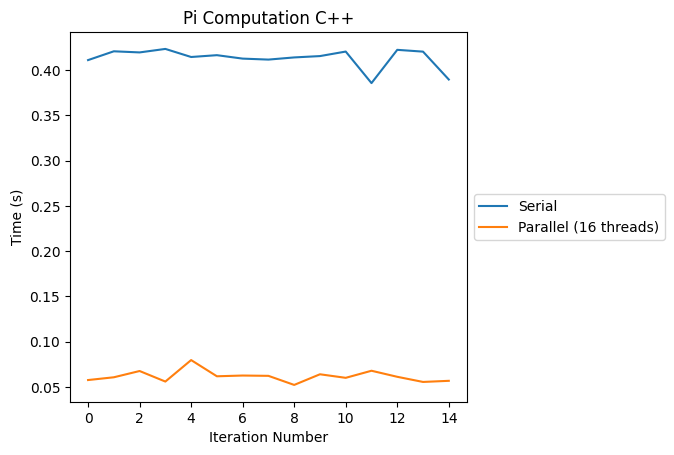

In [6]:
describe_data(programs[0], data[programs[0]])

Name: Pi Computation C++
          Serial  Parallel (16 threads)
count  15.000000              15.000000
mean    0.413365               0.061568
std     0.011136               0.006600
min     0.385774               0.052071
25%     0.412313               0.057034
50%     0.415654               0.061047
75%     0.420614               0.063146
max     0.423570               0.079546



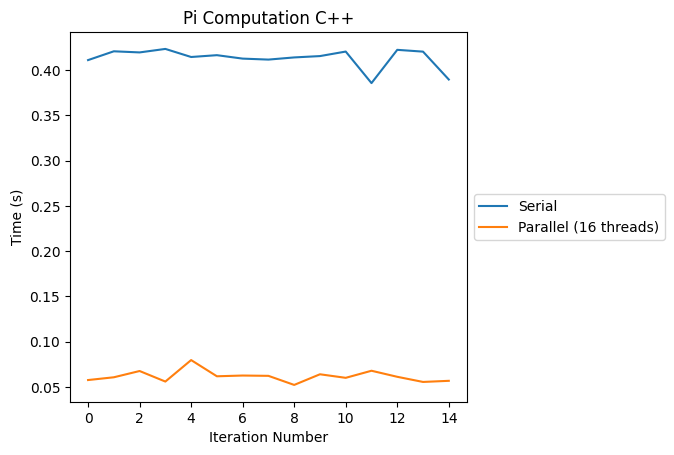

Name: Running Sum C++
          Serial  Parallel (4 threads)
count  15.000000             15.000000
mean    0.106588              0.026114
std     0.002924              0.006003
min     0.102722              0.020935
25%     0.103785              0.021993
50%     0.106760              0.024388
75%     0.108977              0.028007
max     0.111296              0.040382



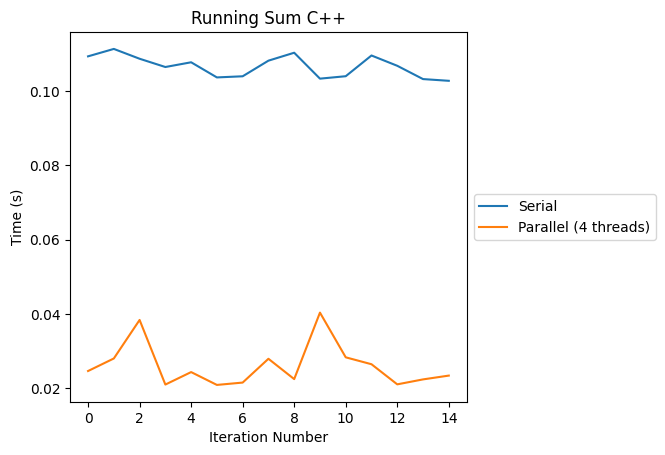

Name: Matrix Multiplication C++
          Serial  Parallel (4 threads)
count  15.000000             15.000000
mean    5.942867              2.173667
std     0.089655              0.119507
min     5.731000              1.996000
25%     5.896500              2.077000
50%     5.956000              2.153000
75%     6.003500              2.241000
max     6.092000              2.386000



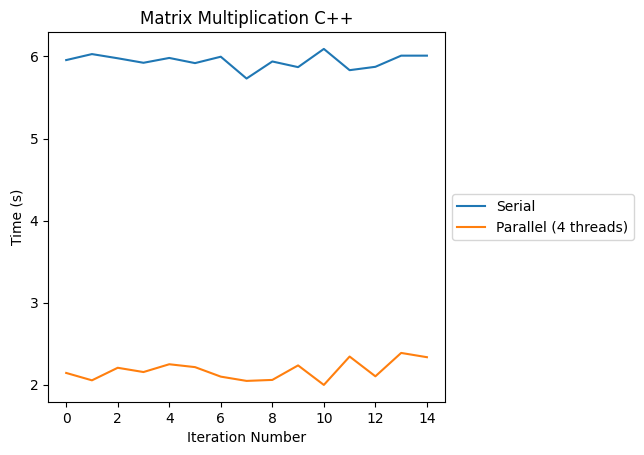

Name: Dot Product C++
          Serial  Parallel (4 threads)
count  15.000000             15.000000
mean    0.043808              0.013365
std     0.001311              0.000698
min     0.042483              0.012122
25%     0.042885              0.012794
50%     0.043516              0.013370
75%     0.044552              0.013712
max     0.047559              0.014550



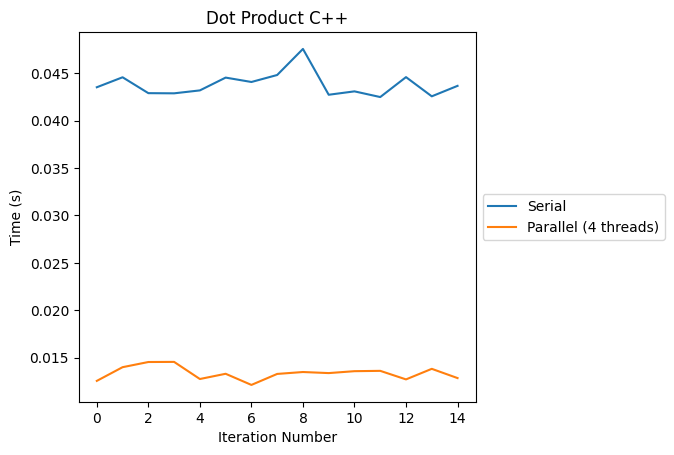

Name: Count Primes C++
          Serial  Parallel (16 threads)  Parallel (4 threads)
count  15.000000              15.000000             15.000000
mean   15.374567               2.779375              8.285820
std     0.068928               0.073358              0.175657
min    15.257500               2.694080              8.089010
25%    15.334500               2.721410              8.137010
50%    15.351200               2.770540              8.264090
75%    15.408150               2.830055              8.366060
max    15.520300               2.934940              8.700350



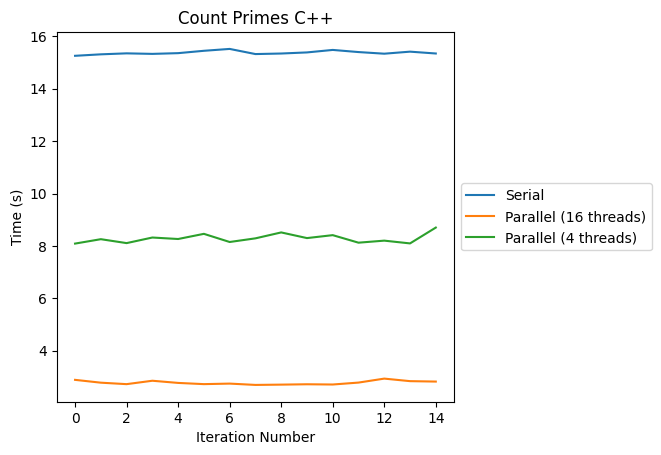

Name: Merge Sort C++
          Serial  Parallel (16 threads)  Parallel (4 threads)
count  15.000000              15.000000             15.000000
mean    7.947702               2.076299              5.270077
std     0.162399               0.057478              0.308528
min     7.757970               1.979952              4.390961
25%     7.828119               2.033230              5.121915
50%     7.925361               2.075684              5.320782
75%     8.027689               2.122899              5.461196
max     8.333938               2.160916              5.674587



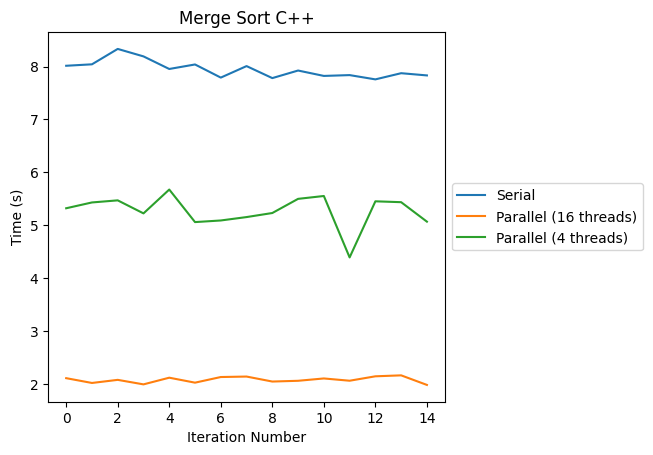

In [7]:
for p in programs:
    describe_data(p, data[p])

In [9]:
average_speedup = {}
for program, df in data.items():
    serial_time = df[df.columns[0]].mean()
    parallel_time = df[df.columns[1]].mean()
    speedup = serial_time / parallel_time
    average_speedup[program] = speedup

average_speedup


{'Pi Computation C++': 6.713932718586632,
 'Running Sum C++': 4.081600559593376,
 'Matrix Multiplication C++': 2.7340285232326327,
 'Dot Product C++': 3.2778914834171275,
 'Count Primes C++': 5.531663957024384,
 'Merge Sort C++': 3.8278210367227072}

In [11]:
max_speedup = max(average_speedup.values())
max_speedup

6.713932718586632

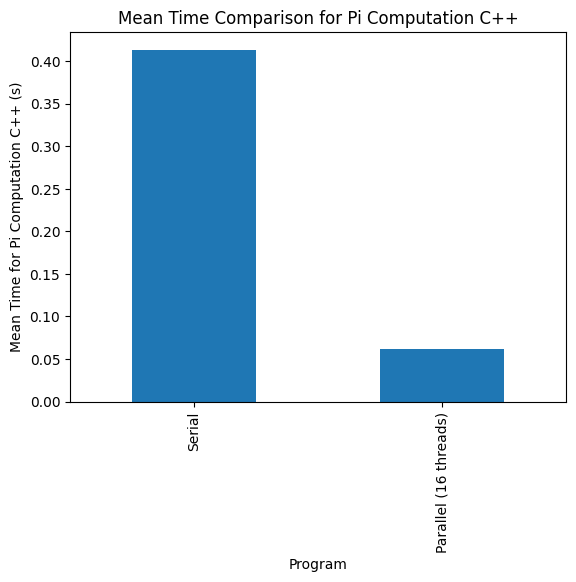

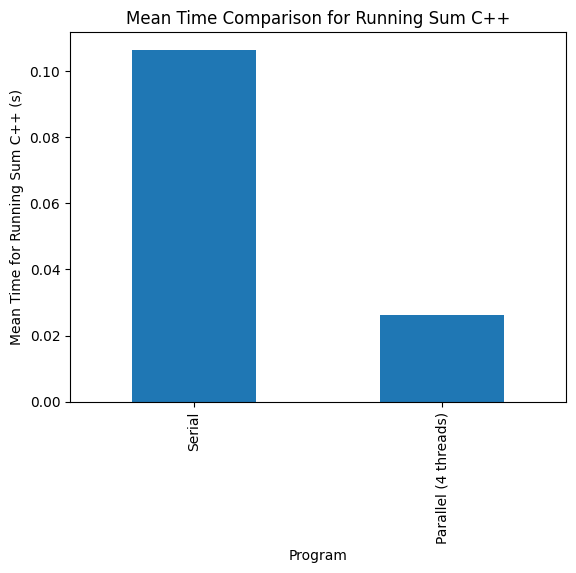

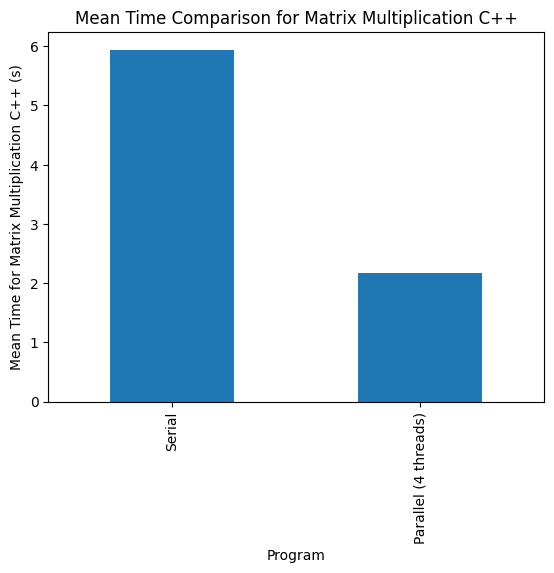

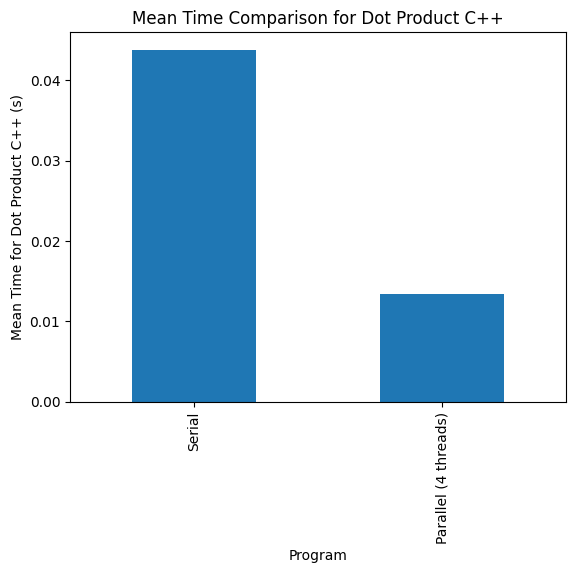

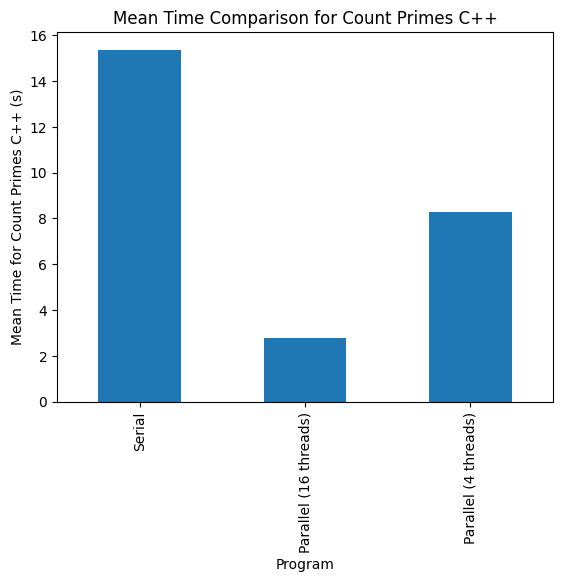

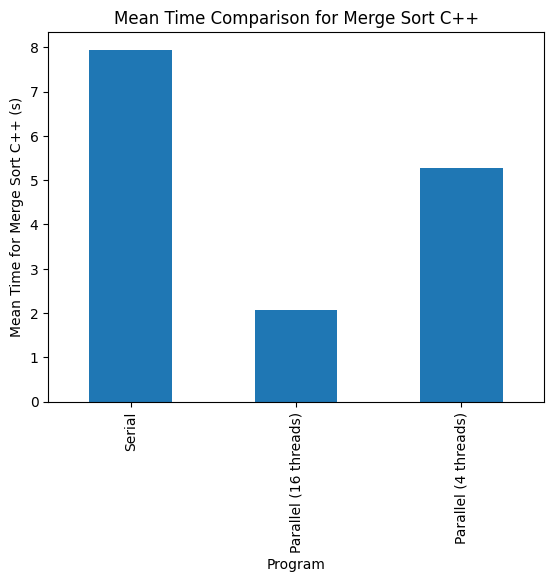

In [16]:
for program, df in data.items():
    df.mean().plot(kind='bar')
    plt.xlabel('Program')
    plt.ylabel('Mean Time for ' + program + ' (s)')
    plt.title('Mean Time Comparison for ' + program)
    plt.show()